# Augment Audio Using AudioFile

In [1]:
import IPython.display as ipd
from AudioFile import AudioFile

from pathlib import Path

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

def show_waveform(a: AudioFile, y_lim: float = 1.):
    plt.figure()
    plt.ylim((-y_lim, y_lim))
    librosa.display.waveplot(a.samples, sr=a.sr)

### Load Two Audio Files

file: p232_013_clean.wav, sr: 16000


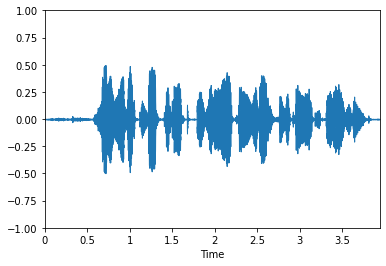

In [3]:
a = AudioFile(path='./example_audio/p232_013_clean.wav')
print('file: {}, sr: {}'.format(a.filename, a.sr))
show_waveform(a)
ipd.Audio(data=a.samples, rate=a.sr, normalize=False)

file: p232_013_clean.wav, sr: 16000


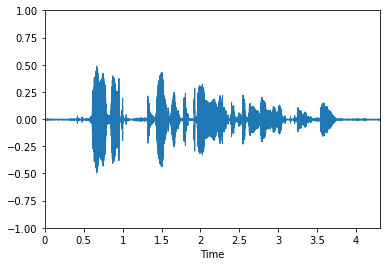

In [4]:
b = AudioFile(path='./example_audio/p257_101_clean.wav')
print('file: {}, sr: {}'.format(a.filename, a.sr))
show_waveform(b)
ipd.Audio(data=b.samples, rate=b.sr, normalize=False)

### Scale Amplitude

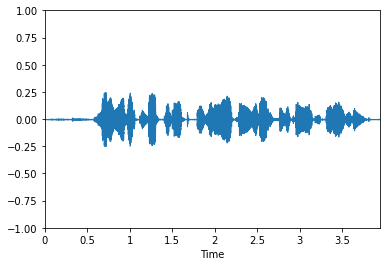

In [5]:
c = a.copy()
c.scale(0.5)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Adjust Amplitude with Gain in Decibels

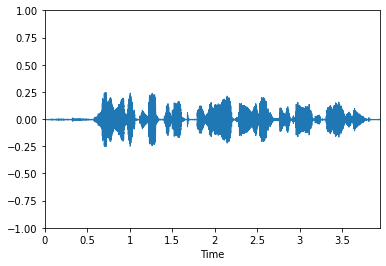

In [6]:
c = a.copy()
c.gain(db=-6)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Normalize Amplitude

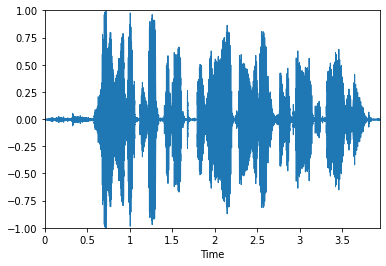

In [7]:
c = a.copy()
c.normalize()
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Invert Polarity - Phase Cancellation

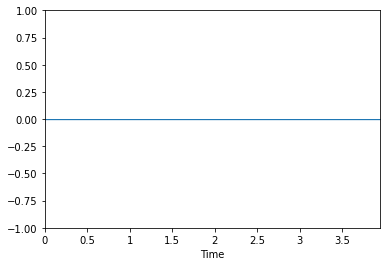

In [8]:
c = a.copy()
c.mix(c.copy().invert_polarity())
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Digital Clipping

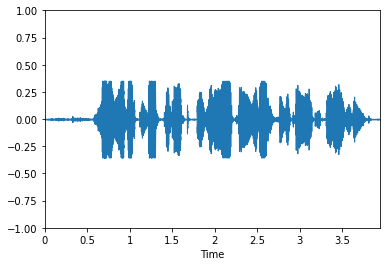

In [9]:
c = a.copy()
c.clip(3.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Amplitude can exceed [-1, 1] during processing

Exception raised - audio data is beyond [-1, 1]
'Audio data must be between -1 and 1 when normalize=False.'


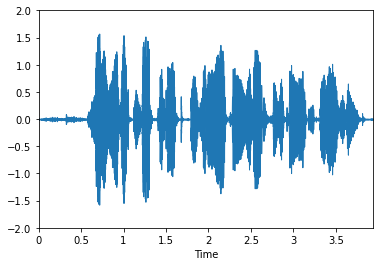

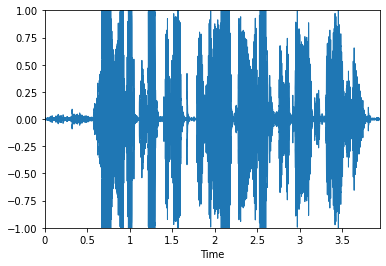

In [10]:
c = a.copy()
c.gain(db=10)
show_waveform(c, y_lim=2.)
show_waveform(c, y_lim=1.)
try:
    ipd.Audio(data=c.samples, rate=c.sr, normalize=False)
except Exception as e:
    print("Exception raised - audio data is beyond [-1, 1]\n'{}'".format(e))

Use `.clip()` or `.normalize()` to make sure audio remains in [-1, 1]

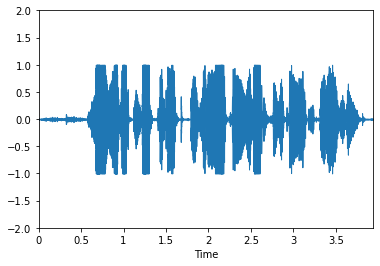

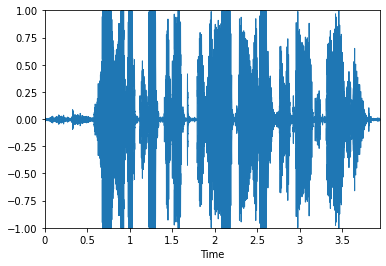

In [11]:
c = a.copy()
c.gain(db=10).clip()
show_waveform(c, y_lim=2.)
show_waveform(c, y_lim=1.)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Pad with Silence

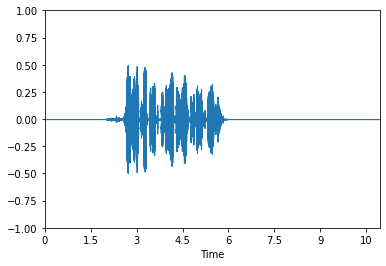

In [12]:
c = a.copy()
c.add_silence(sec_before=2.0, sec_after=5.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Stretch Time/Pitch

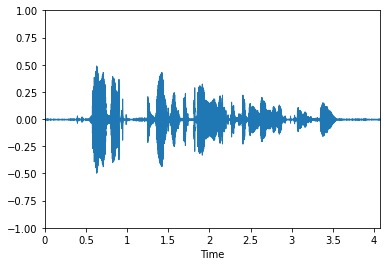

In [13]:
c = b.copy()
c.varispeed(1.0575)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

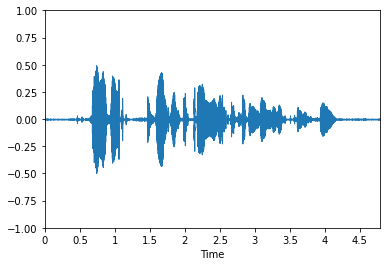

In [14]:
c = b.copy()
c.varispeed(.9)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files Sequentially

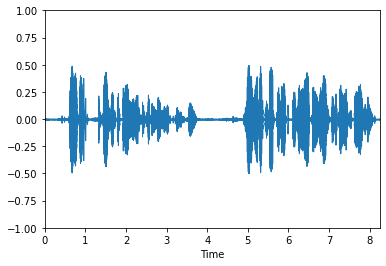

In [15]:
c = b.copy()
c.mix(a, relative_start=1.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files with Overlap

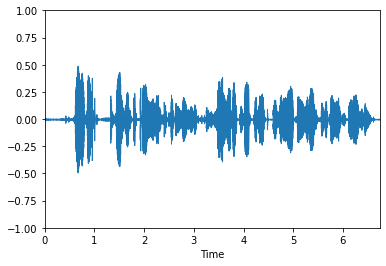

In [16]:
c = b.copy()
c.mix(a.copy().gain(-3), relative_start=.65)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files with Silence

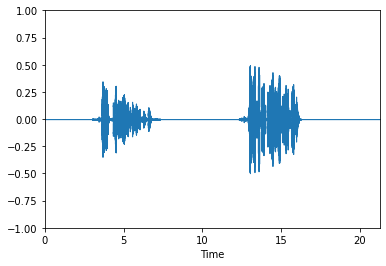

In [17]:
c = b.copy()
c.gain(-3).add_silence(sec_before=3.0)
c.mix(a.copy().add_silence(sec_before=5.0, sec_after=5.0), relative_start=1.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Filters

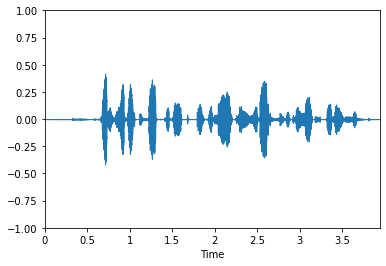

In [18]:
c = a.copy()
c.lpf(2000, 5).hpf(500, 5)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

Mixing a clean signal and filtered signal can be used for EQ boosts.

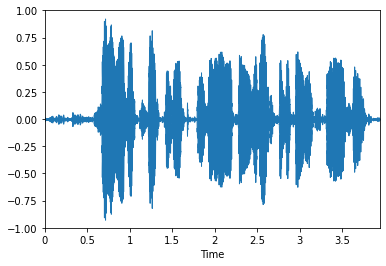

In [19]:
c = a.copy().mix(a.copy().lpf(300, 4).gain(9)).clip()
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Dynamic Filtering

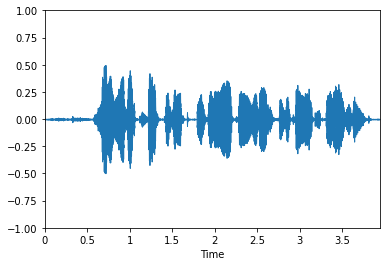

In [20]:
c = a.copy()
c.dynamic_lpf(cutoff=1250,
              order=3,
              relative_start=0.25,
              relative_end=0.75,
              exponential=.3)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Convolution Reverb

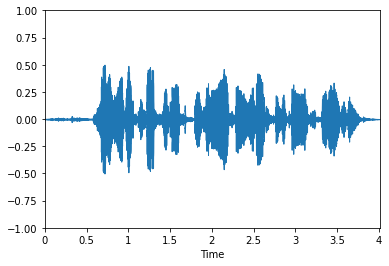

In [21]:
c = a.copy()
ir = Path('./IMreverbs').joinpath('Highly Damped Large Room.wav')
ir = AudioFile(ir)

c.conv_reverb(ir, wet_db=-20, predelay=65)

show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Real-World Example - Method Chaining

Create new clean file with multiple speakers, padded with silence

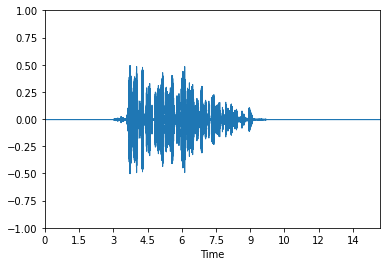

In [22]:
c = a.copy()
c.mix(b.copy().gain(-3), relative_start=0.6).add_silence(sec_before=3, sec_after=5)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

Create new noisy file - transformations can be applied through method chaining to create more complex transformations

* add dynamic filter to simulate speaker turning away
* mix in background noise
* add reverb to simulate speakers in a live room
* remove high-freq content to simulate speaker at a distance
* use digital clipping to simulate poor recording quality

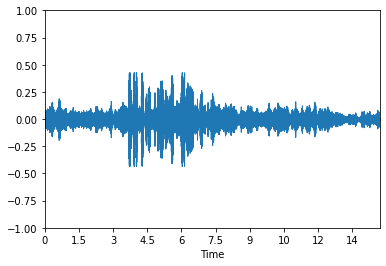

In [23]:
noise = AudioFile(Path('./example_audio/audience_noise_mono.wav'))
noise.gain(4.5)

d = c.copy()

d.dynamic_lpf(cutoff=1250,
              order=3,
              relative_start=0.35,
              relative_end=0.40,
              exponential=.3)
d.mix(noise, maintain_length=True)
d.conv_reverb(ir, wet_db=-25, predelay=35) \
    .lpf(3000) \
    .hpf(250, 2) \
    .clip(3.0)

show_waveform(d)
ipd.Audio(data=d.samples, rate=d.sr, normalize=False)


